In [1]:
pip install psycopg2

  Using cached psycopg2-2.9.3-cp38-cp38-win_amd64.whl (1.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

  Using cached matplotlib-3.5.3-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached fonttools-4.36.0-py3-none-any.whl (950 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached numpy-1.23.2-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached Pillow-9.2.0-cp38-cp38-win_amd64.whl (3.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

  Using cached pandas-1.4.3-cp38-cp38-win_amd64.whl (10.6 MB)
  Using cached pytz-2022.2.1-py2.py3-none-any.whl (500 kB)
Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     -------------------------------------- 38.6/38.6 MB 241.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Sadia_2020",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [4]:
con = PostgresConnection().getConnection()

successfully connected to database


Q1: Find the division wise total_sale_price joining fact table and respective dimension table 

In [5]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  
    



In [6]:
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY CUBE (s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['division', 'sales'])
df

,division,sales
0,BARISAL,1276202.00
1,CHITTAGONG,3330276.00
2,DHAKA,6881352.50
3,KHULNA,1904099.50
4,RAJSHAHI,2082402.50
5,RANGPUR,1442115.00
6,SYLHET,930513.50
7,None,17846961.00


In [7]:
df=df.dropna()

In [8]:
changetype(df)

C:\Users\INFINIE\AppData\Local\Temp\ipykernel_4192\576319699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


In [9]:
df=df.set_index(['division'])

<AxesSubplot:ylabel='sales'>

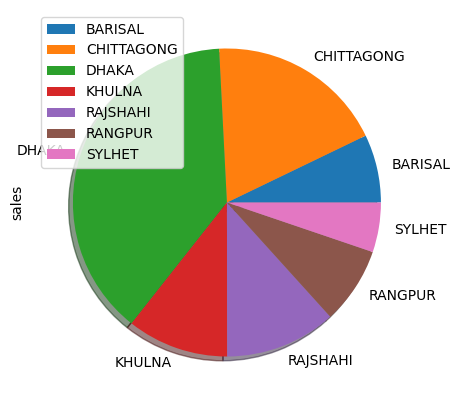

In [10]:
df.plot.pie(y='sales',figsize=(5,5),shadow='True')

Q1: district wise total_sale_price joining fact table and respective dimension table 

In [11]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT s.district, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY SUM(t.total_price)"
curr.execute(select_stmts)
records1 = curr.fetchall()
records1

successfully connected to database


[('NARAIL', Decimal('72251.00')),
 ('MEHERPUR', Decimal('76990.50')),
 ('MAGURA', Decimal('94723.50')),
 ('CHUADANGA', Decimal('100122.50')),
 ('MADARIPUR', Decimal('101849.50')),
 ('JHALOKATI', Decimal('103061.50')),
 ('PANCHAGARH', Decimal('111245.00')),
 ('GOPALGANJ', Decimal('111566.50')),
 ('NARAYANGANJ', Decimal('115289.00')),
 ('RAJBARI', Decimal('116747.00')),
 ('SHERPUR', Decimal('119226.50')),
 ('CHAPAI NABABGANJ', Decimal('121110.00')),
 ('THAKURGAON', Decimal('126088.50')),
 ('LAKSHMIPUR', Decimal('129304.50')),
 ('JOYPURHAT', Decimal('129858.00')),
 ('GAZIPUR', Decimal('134736.00')),
 ('BARGUNA', Decimal('137691.00')),
 ('LALMONIRHAT', Decimal('139172.00')),
 ('NARSINGDI', Decimal('143313.50')),
 ('MUNSHIGANJ', Decimal('145376.50')),
 ('NILPHAMARI', Decimal('148636.00')),
 ('SHARIATPUR', Decimal('149598.50')),
 ('FENI', Decimal('151458.00')),
 ('JHENAIDAH', Decimal('153250.00')),
 ('KUSHTIA', Decimal('154800.50')),
 ('BANDARBAN', Decimal('163773.00')),
 ('JAMALPUR', Decima

In [12]:
dis = pd.DataFrame(list(records1), columns=['district', 'sales'])
dis

,district,sales
0,NARAIL,72251.00
1,MEHERPUR,76990.50
2,MAGURA,94723.50
3,CHUADANGA,100122.50
4,MADARIPUR,101849.50
...,...,...
60,RAJSHAHI,653008.00
61,KHULNA,672414.00
62,CHITTAGONG,1226760.00
63,DHAKA,3998741.50


In [13]:
dis=dis.dropna()
changetype(dis)
dis.dtypes

C:\Users\INFINIE\AppData\Local\Temp\ipykernel_4192\576319699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


district     object
sales       float64
dtype: object

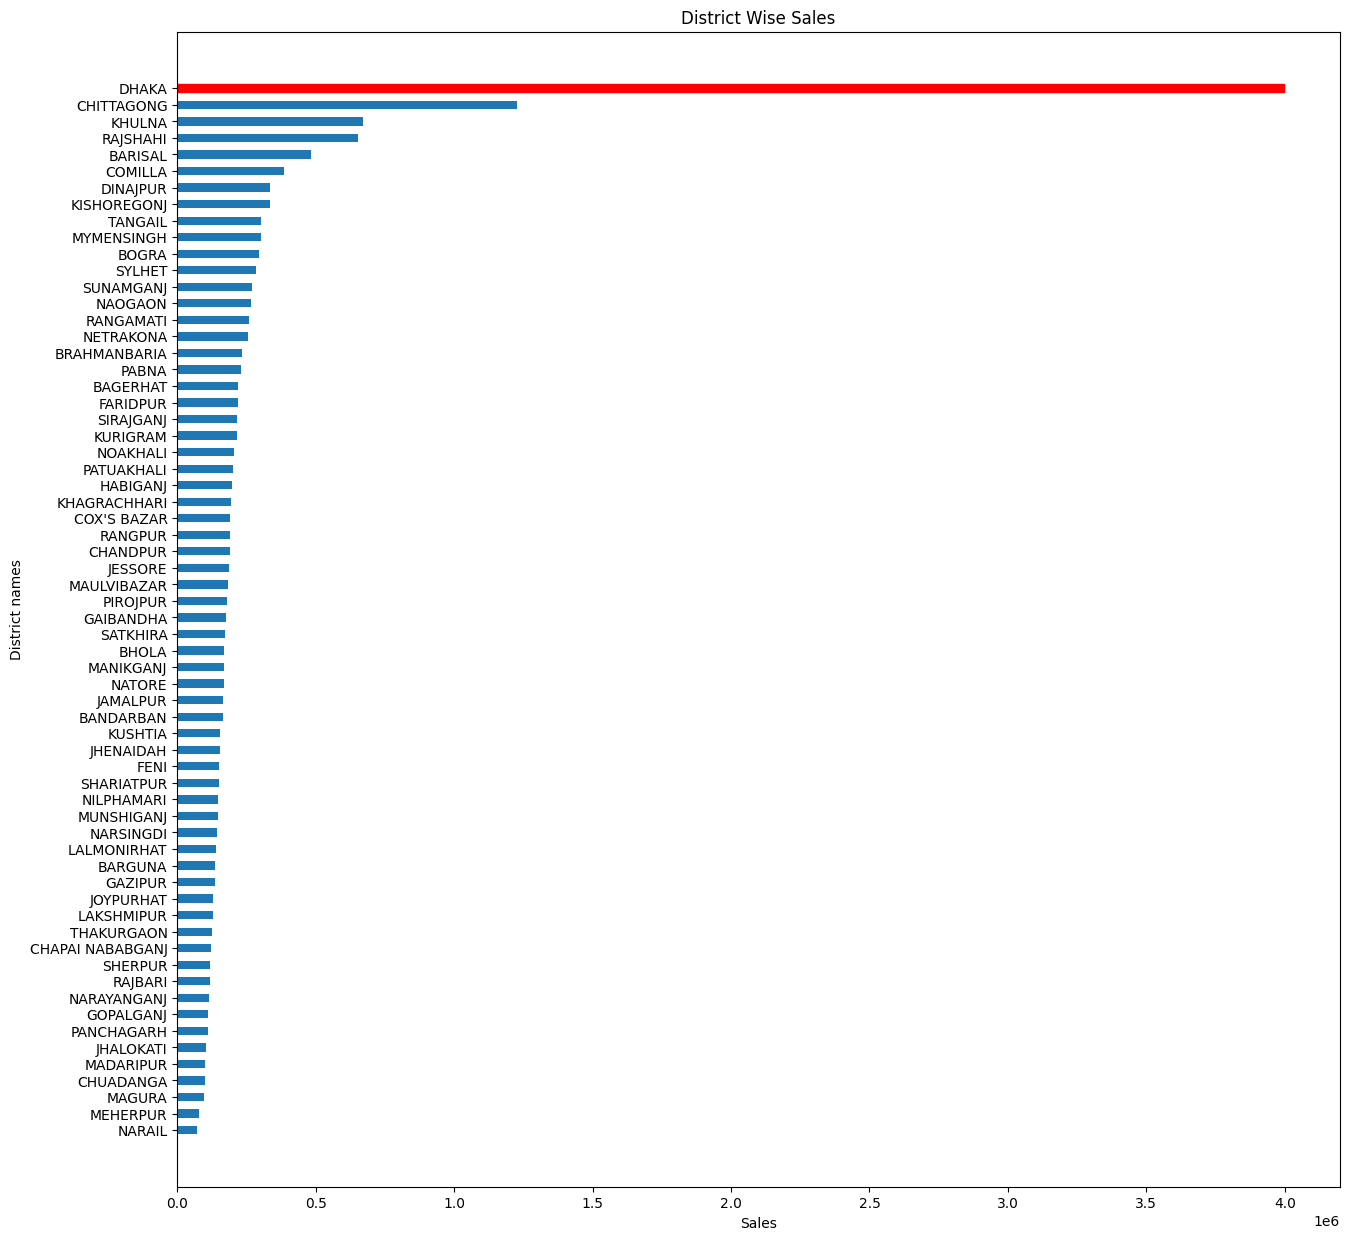

In [14]:
plt.figure(figsize = (15, 15))
barlist=plt.barh(dis['district'],dis['sales'], height=0.5)
barlist[63].set_color('r')
plt.title('District Wise Sales')
plt.xlabel('Sales')
plt.ylabel('District names') 
plt.show()

Q1: year wise total_sale_price joining fact table and respective dimension table 

In [15]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY CUBE(tim.year) " \
                "ORDER BY SUM(t.total_price) desc"
curr.execute(select_stmts)
records_year = curr.fetchall()
records_year

successfully connected to database


[(None, Decimal('17846961.00')),
 (2020, Decimal('2693769.50')),
 (2018, Decimal('2661466.00')),
 (2014, Decimal('2594400.00')),
 (2015, Decimal('2558759.00')),
 (2016, Decimal('2493810.00')),
 (2017, Decimal('2431545.50')),
 (2019, Decimal('2413211.00'))]

In [16]:
time = pd.DataFrame(list(records_year), columns=['year', 'sales'])
time

,year,sales
0,NaN,17846961.00
1,2020.0,2693769.50
2,2018.0,2661466.00
3,2014.0,2594400.00
4,2015.0,2558759.00
5,2016.0,2493810.00
6,2017.0,2431545.50
7,2019.0,2413211.00


In [17]:
time.dtypes
changetype(time)
time=time.dropna()
time

,year,sales
1,2020.0,2693769.5
2,2018.0,2661466.0
3,2014.0,2594400.0
4,2015.0,2558759.0
5,2016.0,2493810.0
6,2017.0,2431545.5
7,2019.0,2413211.0


Empty DataFrame
Columns: [year, sales]
Index: []


<AxesSubplot:title={'center':'Year Wise Sales'}, xlabel='year', ylabel='sales'>

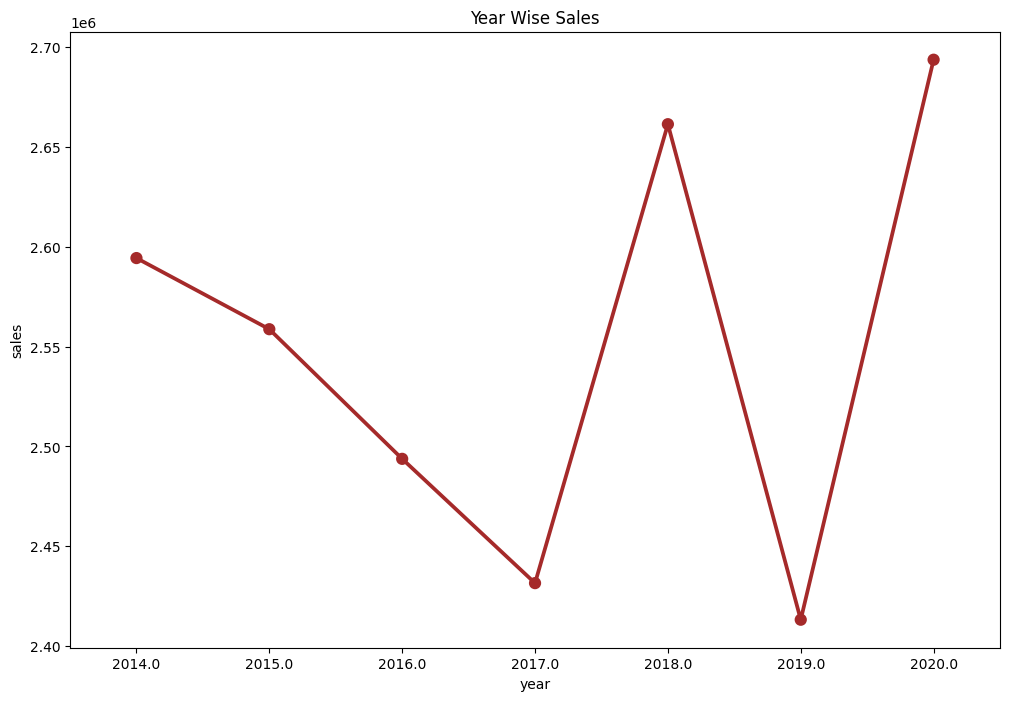

In [18]:
plt.figure(figsize = (12, 8))
plt.title('Year Wise Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
t=time.loc[time['year']==2021]
print(t)
sns.pointplot(data=time,x='year',y='sales',color='brown')

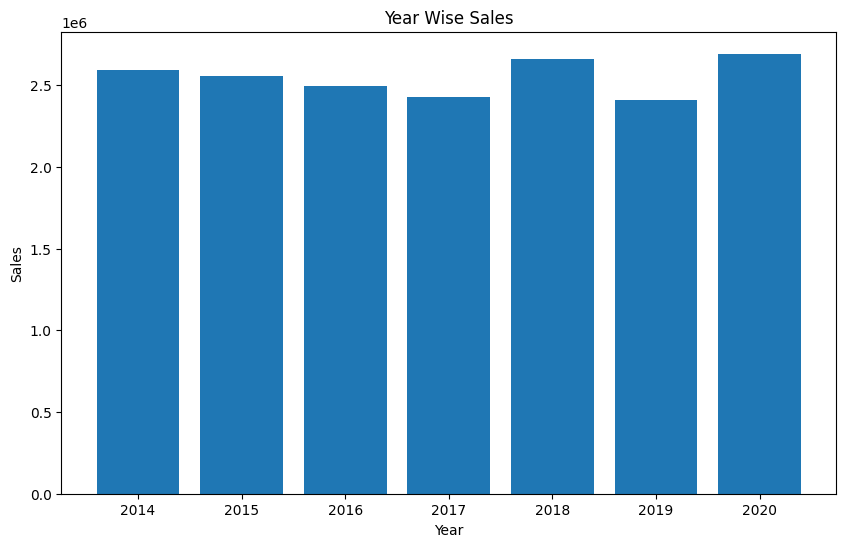

In [19]:
plt.figure(figsize = (10, 6))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Year Wise Sales')
barlist=plt.bar(time['year'],time['sales'])
#barlist[5].set_color('r')

plt.show()

Q1: month wise total_sale_price joining fact table and respective dimension table 

In [20]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.month, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "GROUP BY CUBE(tim.month) " \
                "ORDER BY tim.month"
curr.execute(select_stmts)
records_month = curr.fetchall()
records_month

successfully connected to database


[(1, Decimal('18084488.00')),
 (2, Decimal('16147755.00')),
 (3, Decimal('17878304.00')),
 (4, Decimal('17009269.50')),
 (5, Decimal('18156005.00')),
 (6, Decimal('17113706.00')),
 (7, Decimal('18093160.00')),
 (8, Decimal('17858950.50')),
 (9, Decimal('17448653.00')),
 (10, Decimal('17805567.50')),
 (11, Decimal('17360052.00')),
 (12, Decimal('17846961.00')),
 (None, Decimal('210802871.50'))]

In [21]:
month = pd.DataFrame(list(records_month), columns=['month', 'sales'])
month


,month,sales
0,1.0,18084488.00
1,2.0,16147755.00
2,3.0,17878304.00
3,4.0,17009269.50
4,5.0,18156005.00
5,6.0,17113706.00
6,7.0,18093160.00
7,8.0,17858950.50
8,9.0,17448653.00
9,10.0,17805567.50


In [22]:
month=month.dropna()
month

,month,sales
0,1.0,18084488.00
1,2.0,16147755.00
2,3.0,17878304.00
3,4.0,17009269.50
4,5.0,18156005.00
5,6.0,17113706.00
6,7.0,18093160.00
7,8.0,17858950.50
8,9.0,17448653.00
9,10.0,17805567.50


In [23]:
month_name = ['January', 'February', 'March', 'April','May','June','July','August', 'September','October','November','December']
month['month_name']=month_name

C:\Users\INFINIE\AppData\Local\Temp\ipykernel_4192\3897362985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['month_name']=month_name


In [24]:
changetype(month)

C:\Users\INFINIE\AppData\Local\Temp\ipykernel_4192\576319699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


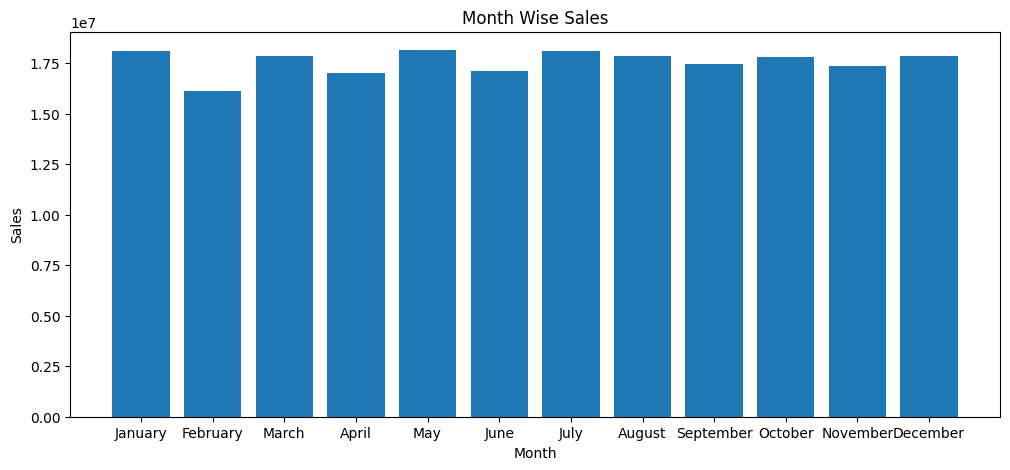

In [25]:
plt.figure(figsize = (12, 5))
plt.bar(month['month_name'],month['sales'])
plt.title('Month Wise Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Q2: customer wise total_sale_price joining fact table and respective dimension table 

In [26]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT s.name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim s on s.customer_key=t.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim tim on tim.payment_key=t.payment_key " \
                "GROUP BY CUBE (s.name) " \
                "ORDER BY s.name"
curr.execute(select_stmts)
records_cus = curr.fetchall()
records_cus

successfully connected to database


[('-', Decimal('41287.00')),
 ('aafreen fatima', Decimal('22349.50')),
 ('aafrin', Decimal('44273.50')),
 ('aafrin @ dolly', Decimal('47059.50')),
 ('aaftaab husan', Decimal('19364.00')),
 ('aakanksha', Decimal('22938.00')),
 ('aaliya', Decimal('43326.50')),
 ('aamina', Decimal('25298.50')),
 ('aamir', Decimal('20268.00')),
 ('aamir hussain', Decimal('21785.00')),
 ('aamod & pramod', Decimal('24560.50')),
 ('aamrin jahan', Decimal('23244.00')),
 ('aanamika misra', Decimal('17858.50')),
 ('aanchal', Decimal('71407.00')),
 ('aanik with her son', Decimal('17136.50')),
 ('aansi devi', Decimal('19818.00')),
 ('aanya @ china', Decimal('22887.00')),
 ('aaradhana @ priyanka', Decimal('22938.50')),
 ('aarifa bano', Decimal('22591.50')),
 ('aarifun bivi', Decimal('26278.50')),
 ('aarti', Decimal('1323350.50')),
 ('aarti @ kajal', Decimal('24217.00')),
 ('aarti @ noni', Decimal('24671.00')),
 ('aarti bunkar', Decimal('27323.50')),
 ('aarti devi', Decimal('53074.00')),
 ('aarti diwakar', Decimal('

In [27]:
cus = pd.DataFrame(list(records_cus), columns=['name', 'sales'])
cus=cus.dropna()
cus

,name,sales
0,-,41287.00
1,aafreen fatima,22349.50
2,aafrin,44273.50
3,aafrin @ dolly,47059.50
4,aaftaab husan,19364.00
...,...,...
4532,बबीता,21019.50
4533,मन्जू,21151.50
4534,माया,19725.00
4535,सरोज,22560.00


In [28]:
cus.dtypes

name     object
sales    object
dtype: object

In [29]:
cus2=cus
cus2.sort_values(by=["sales"],inplace=True,ascending=False)
cus2

,name,sales
2524,pooja,4219601.50
1201,jyoti,2663392.50
2272,neha,1992242.00
4181,sunita,1831087.50
2563,poonam,1828570.50
...,...,...
74,ahsamin @ juhi,15108.50
3854,smt sujata,14992.50
1941,meenaxi,14227.00
397,bahwana,14211.00


In [30]:
changetype(cus2)
df=cus2[0:10]

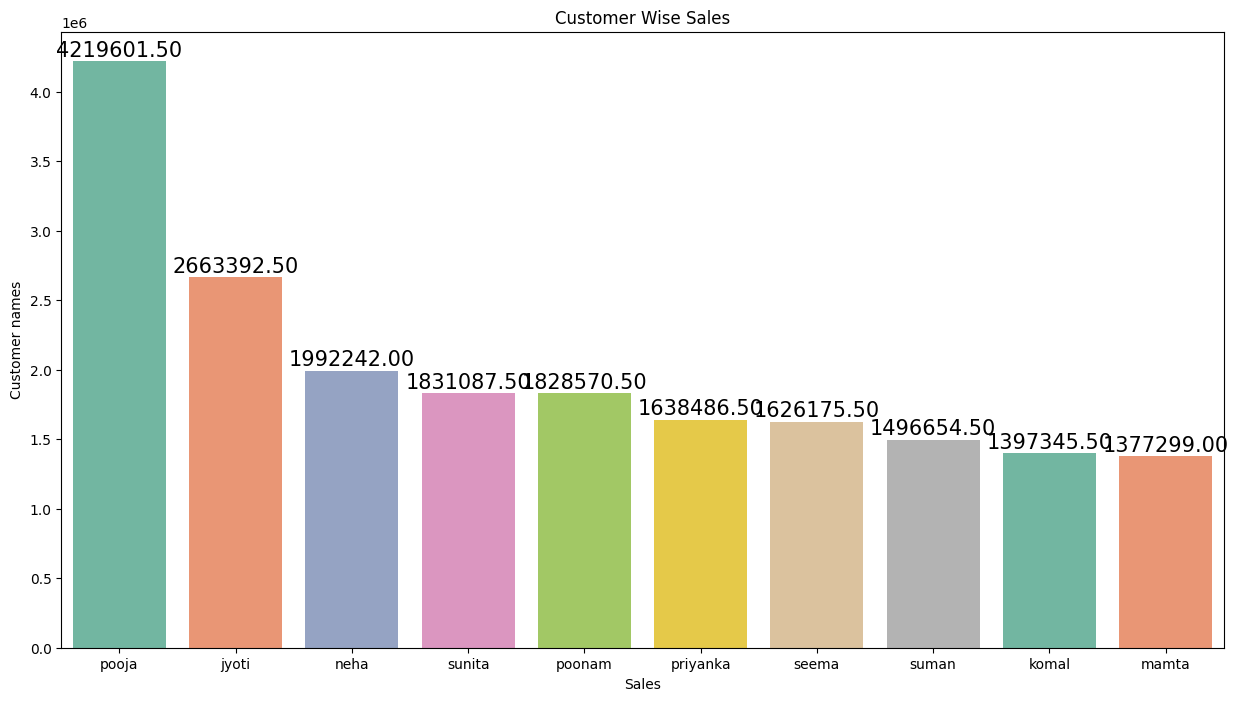

In [31]:
#Creating bar plot
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plots=sns.barplot(x = df['name'],y = df['sales'],palette = "Set2")



for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
#Adding the aesthetics
plt.title('Customer Wise Sales')
plt.xlabel('Sales')
plt.ylabel('Customer names') 
# Show the plot
plt.show()

In [32]:
x=df.nlargest(1, 'sales').values
print('Customer '+str(x[::,0])+' has the highest purchase of '+str(x[::,1])+ 'taka')

Customer ['pooja'] has the highest purchase of [4219601.5]taka


In [33]:
df=cus[0:20]
df=df.set_index(['name'])
df

,sales
name,
pooja,4219601.5
jyoti,2663392.5
neha,1992242.0
sunita,1831087.5
poonam,1828570.5
priyanka,1638486.5
seema,1626175.5
suman,1496654.5
komal,1397345.5


Q2:bank wise total_sale_price joining fact table and respective dimension table 

In [34]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.bank_name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim s on s.customer_key=t.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim tim on tim.payment_key=t.payment_key " \
                "GROUP BY CUBE(tim.bank_name) " \
                "ORDER BY tim.bank_name"
curr.execute(select_stmts)
records_bank = curr.fetchall()
records_bank

successfully connected to database


[('AB Bank Limited', Decimal('5457031.00')),
 ('Bangladesh Commerce Bank Limited', Decimal('5461998.50')),
 ('Bank Asia Limited', Decimal('5374285.50')),
 ('Bengal Commercial Bank Ltd', Decimal('5409108.50')),
 ('Bkash', Decimal('5378705.00')),
 ('BRAC Bank Limited', Decimal('5411591.50')),
 ('Citizens Bank Limited', Decimal('5446430.50')),
 ('City Bank Limited', Decimal('5427905.00')),
 ('Community Bank Bangladesh Limited', Decimal('5371503.00')),
 ('Dhaka Bank Limited', Decimal('5456732.00')),
 ('Dutch-Bangla Bank Limited', Decimal('5384870.50')),
 ('Eastern Bank Limited', Decimal('5374364.50')),
 ('IFIC Bank Limited', Decimal('5399519.50')),
 ('Jamuna Bank Limited', Decimal('5379773.00')),
 ('Meghna Bank Limited', Decimal('5401057.00')),
 ('Mercantile Bank Limited', Decimal('5353157.00')),
 ('Midland Bank Limited', Decimal('5376860.50')),
 ('Modhumoti Bank Limited', Decimal('5430558.00')),
 ('Mutual Trust Bank Limited', Decimal('5340061.00')),
 ('Nagad', Decimal('5399109.00')),
 ('N

In [35]:
bank = pd.DataFrame(list(records_bank), columns=['bank_name', 'sales'])
bank=bank.dropna()
bank

,bank_name,sales
0,AB Bank Limited,5457031.00
1,Bangladesh Commerce Bank Limited,5461998.50
2,Bank Asia Limited,5374285.50
3,Bengal Commercial Bank Ltd,5409108.50
4,Bkash,5378705.00
5,BRAC Bank Limited,5411591.50
6,Citizens Bank Limited,5446430.50
7,City Bank Limited,5427905.00
8,Community Bank Bangladesh Limited,5371503.00
9,Dhaka Bank Limited,5456732.00


In [36]:
bank.dtypes

bank_name    object
sales        object
dtype: object

In [37]:
changetype(bank)

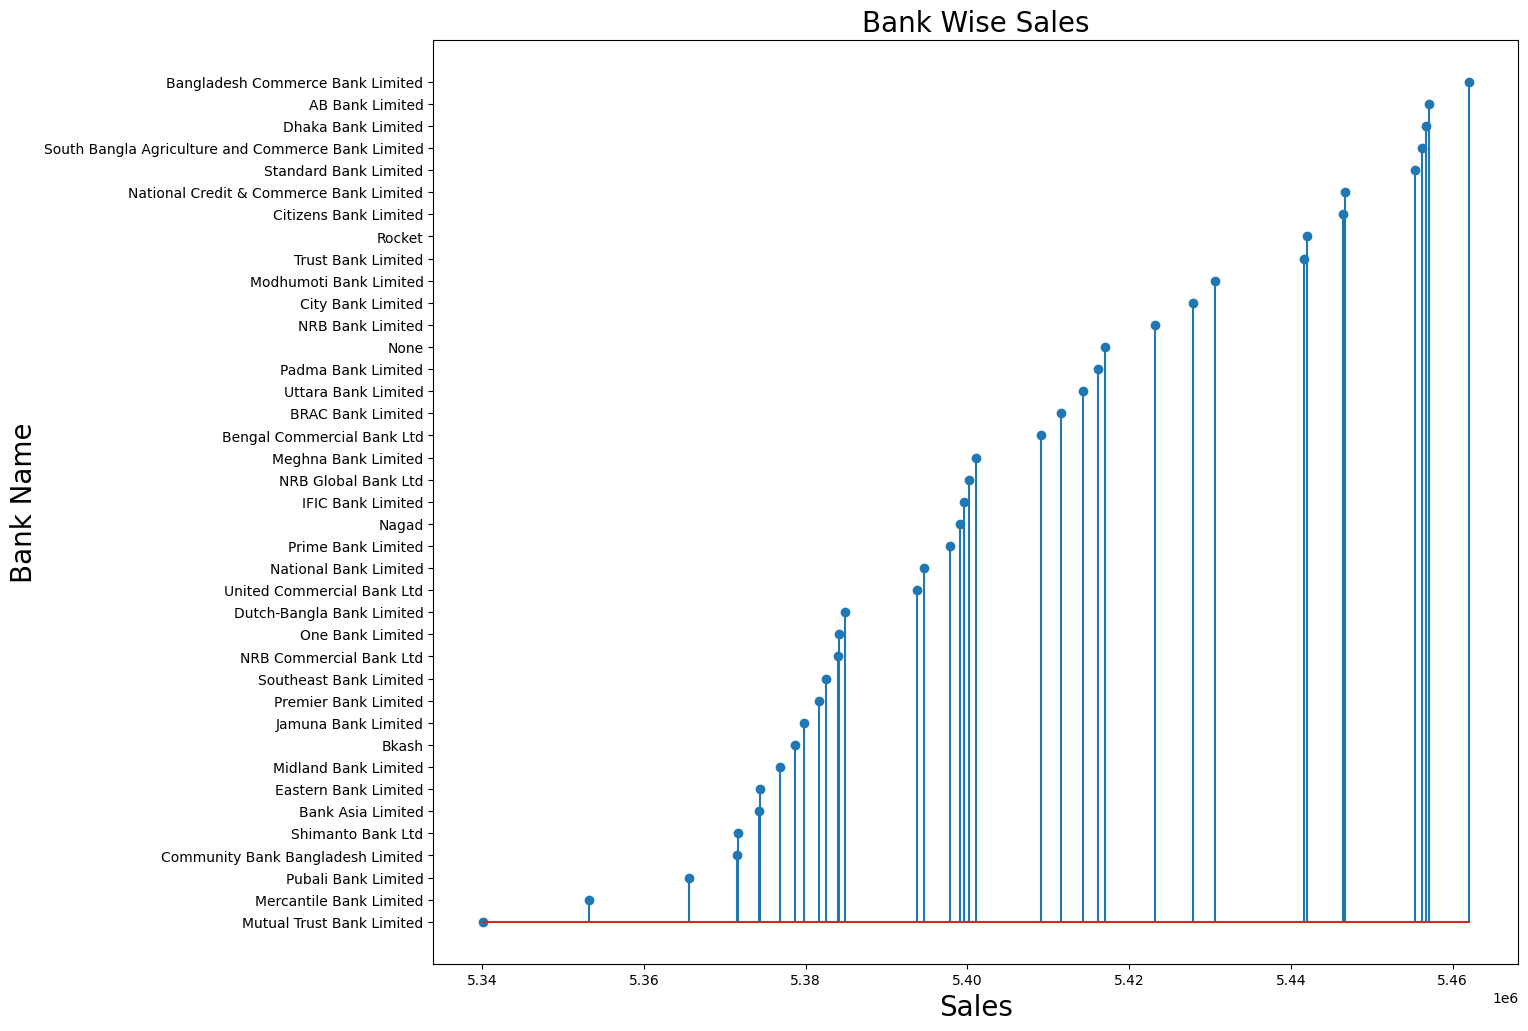

In [38]:
plt.figure(figsize = (14, 12))
bankdf= bank
plt.title('Bank Wise Sales',fontsize=20)
plt.ylabel('Bank Name',fontsize=20)
plt.xlabel('Sales',fontsize=20)
bank.sort_values(by=["sales"],inplace=True)
#plt.plot(bank.sales,bank.bank_name, linestyle = 'solid')
#sns.pointplot(x=bank.sales,y=bank.bank_name,color='r')
plt.stem(bank['sales'],bank['bank_name'])
plt.show()

Q2: transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [39]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.trans_type, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim s on s.customer_key=t.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim tim on tim.payment_key=t.payment_key " \
                "GROUP BY CUBE(tim.trans_type) " \
                "ORDER BY tim.trans_type"
curr.execute(select_stmts)
records_transtype = curr.fetchall()
records_transtype

successfully connected to database


[('card', Decimal('189166077.00')),
 ('cash', Decimal('5417031.50')),
 ('mobile', Decimal('16219763.00')),
 (None, Decimal('210802871.50'))]

In [40]:
transtype = pd.DataFrame(list(records_transtype), columns=['trans_type', 'sales'])
transtype=transtype.dropna()
transtype

,trans_type,sales
0,card,189166077.00
1,cash,5417031.50
2,mobile,16219763.00


In [41]:
transtype.dtypes
changetype(transtype)
transtype = transtype.set_index(['trans_type'])

<AxesSubplot:ylabel='sales'>

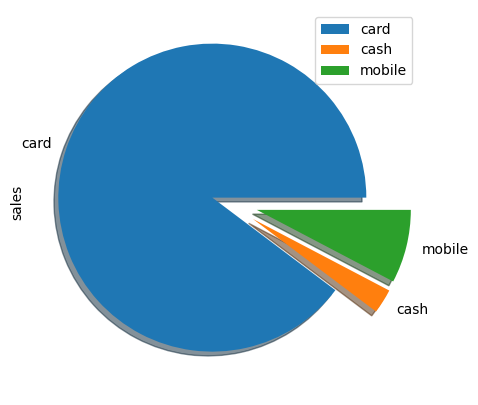

In [42]:
myexplode = [0.1, 0.2, 0.2]
transtype.plot.pie(y='sales',figsize=(5,5),shadow='True',explode=myexplode)

Q3: Total sales in Barisal

In [43]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE s.division='BARISAL' "\
                "GROUP BY CUBE(s.division) "\
                "ORDER BY s.division"
cur.execute(select_stmt)
records_bari = cur.fetchall()
records_bari

successfully connected to database


[('BARISAL', Decimal('15040687.50')), (None, Decimal('15040687.50'))]

In [44]:
bar = pd.DataFrame(list(records_bari), columns=['division', 'sales'])
bar=bar.dropna()
bar

,division,sales
0,BARISAL,15040687.50


Q4: Total sales in 2015

In [45]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.year='2015' " \
                "GROUP BY CUBE(tim.year) " \
                "ORDER BY tim.year"
curr.execute(select_stmts)
records = curr.fetchall()
records

successfully connected to database


[(2015, Decimal('30191440.50')), (None, Decimal('30191440.50'))]

Q5: Total sales of Barisal in 2015

In [46]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT t.year, s.division, SUM(f.total_price) as total_sale_price " \
"FROM ecomdb_star_schema.fact_table as f "\
"JOIN ecomdb_star_schema.time_dim as t ON t.time_key = f.time_key " \
"JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key "\
"WHERE t.year =2015 and s.division = 'BARISAL' "\
"GROUP BY CUBE(t.year, s.division)"
                
curr.execute(select_stmts)
records_bar2015 = curr.fetchall()
records_bar2015

successfully connected to database


[(2015, 'BARISAL', Decimal('2153805.50')),
 (2015, None, Decimal('2153805.50')),
 (None, None, Decimal('2153805.50')),
 (None, 'BARISAL', Decimal('2153805.50'))]

In [47]:
bar2015 = pd.DataFrame(list(records_bar2015), columns=['division','year', 'sales'])
bar2015=bar2015.dropna()
bar2015

,division,year,sales
0,2015.0,BARISAL,2153805.50


f:\sda lab\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


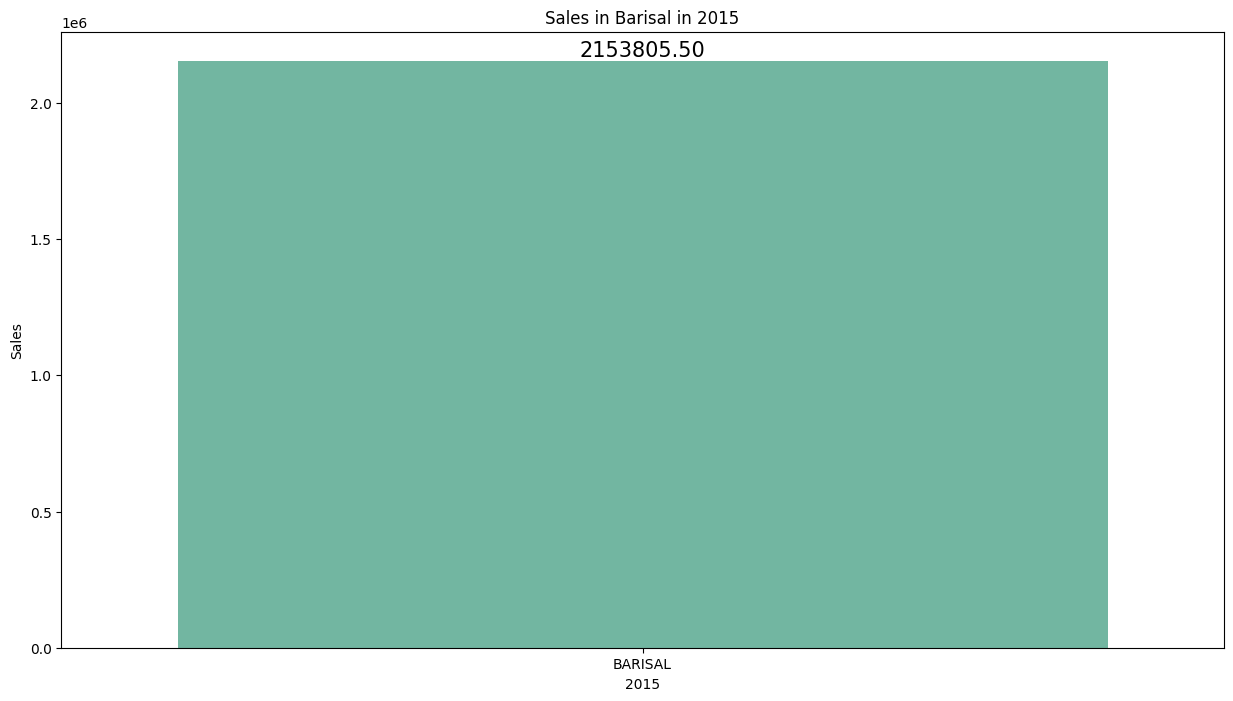

In [48]:
#Creating bar plot
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plots_year=sns.barplot(bar2015['year'],bar2015['sales'],palette = "Set2")



for bar in plots_year.patches:
    plots_year.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
#Adding the aesthetics
plt.title('Sales in Barisal in 2015')
plt.xlabel('2015')
plt.ylabel('Sales') 
# Show the plot
plt.show()

Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

In [64]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT s.store_key as store_key, i.item_name as item_name, sum(f.quantity) as quantity_sales_for_each_item " \
"FROM ecomdb_star_schema.fact_table as f "\
"JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key " \
"JOIN ecomdb_star_schema.item_dim as i ON i.item_key = f.item_key "\
"GROUP BY CUBE(s.store_key, i.item_name)"\
"ORDER BY s.store_key, sum(f.quantity) desc"
                
curr.execute(select_stmts)
records_top3 = curr.fetchall()
records_top3

successfully connected to database


[('S0001', None, 16338),
 ('S0001', 'Pepsi - 12 oz cans', 184),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', 180),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', 156),
 ('S0001', 'Waterloo Sparkling Lime 12oz', 140),
 ('S0001', 'Njoy Sugar Canister 22 oz', 138),
 ('S0001', 'Vita Coconut Water 10oz ', 136),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', 134),
 ('S0001', 'Sprite - 12 oz cans', 128),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', 126),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', 124),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', 122),
 ('S0001', 'A&W Root Beer - 12 oz cans', 120),
 ('S0001', 'Dark Chocolate Mint Patties', 120),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', 120),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', 118),
 ('S0001', 'Large Trash Bags Black 33 gal', 118),
 ('S0001', 'Kellogg Fun Mix Cheez it, Prngls, Fam Amos', 116),
 ('S0001', 'Quaker Instant Oatmeal Maple Brn Sugar', 114),
 ('S0001', 'Frito Bold Flavors Var

In [65]:
top3 = pd.DataFrame(list(records_top3), columns=['store_id', 'item', 'quantity'])
top3=top3.dropna()
top3 = top3.groupby('store_id').head(3)
top3.head(20)

,store_id,item,quantity
1,S0001,Pepsi - 12 oz cans,184
2,S0001,Muscle Milk Protein Shake Van. 11oz,180
3,S0001,Hefty Supreme Foam Plates 6 inch,156
259,S0002,Planters Nut-trition 1.5 oz,166
260,S0002,Altoids Small Packs Variety,160
261,S0002,Hefty Supreme Foam Bowls 12oz,156
518,S0003,Sprite - 12 oz cans,244
519,S0003,Diet Coke - 12 oz cans,218
520,S0003,Muscle Milk Protein Shake Van. 11oz,152
777,S0004,Kind Bars Variety Pack 1.4 oz,158


In [66]:
top3.dtypes

store_id    object
item        object
quantity     int64
dtype: object

In [67]:
top3

,store_id,item,quantity
1,S0001,Pepsi - 12 oz cans,184
2,S0001,Muscle Milk Protein Shake Van. 11oz,180
3,S0001,Hefty Supreme Foam Plates 6 inch,156
259,S0002,Planters Nut-trition 1.5 oz,166
260,S0002,Altoids Small Packs Variety,160
...,...,...,...
187322,S0098,Cliff Builders Protein Bar Variety Pack,168
187323,S0098,Pepsi - 12 oz cans,158
187581,S0099,Pepsi - 12 oz cans,186
187582,S0099,Diet Coke - 12 oz cans,174


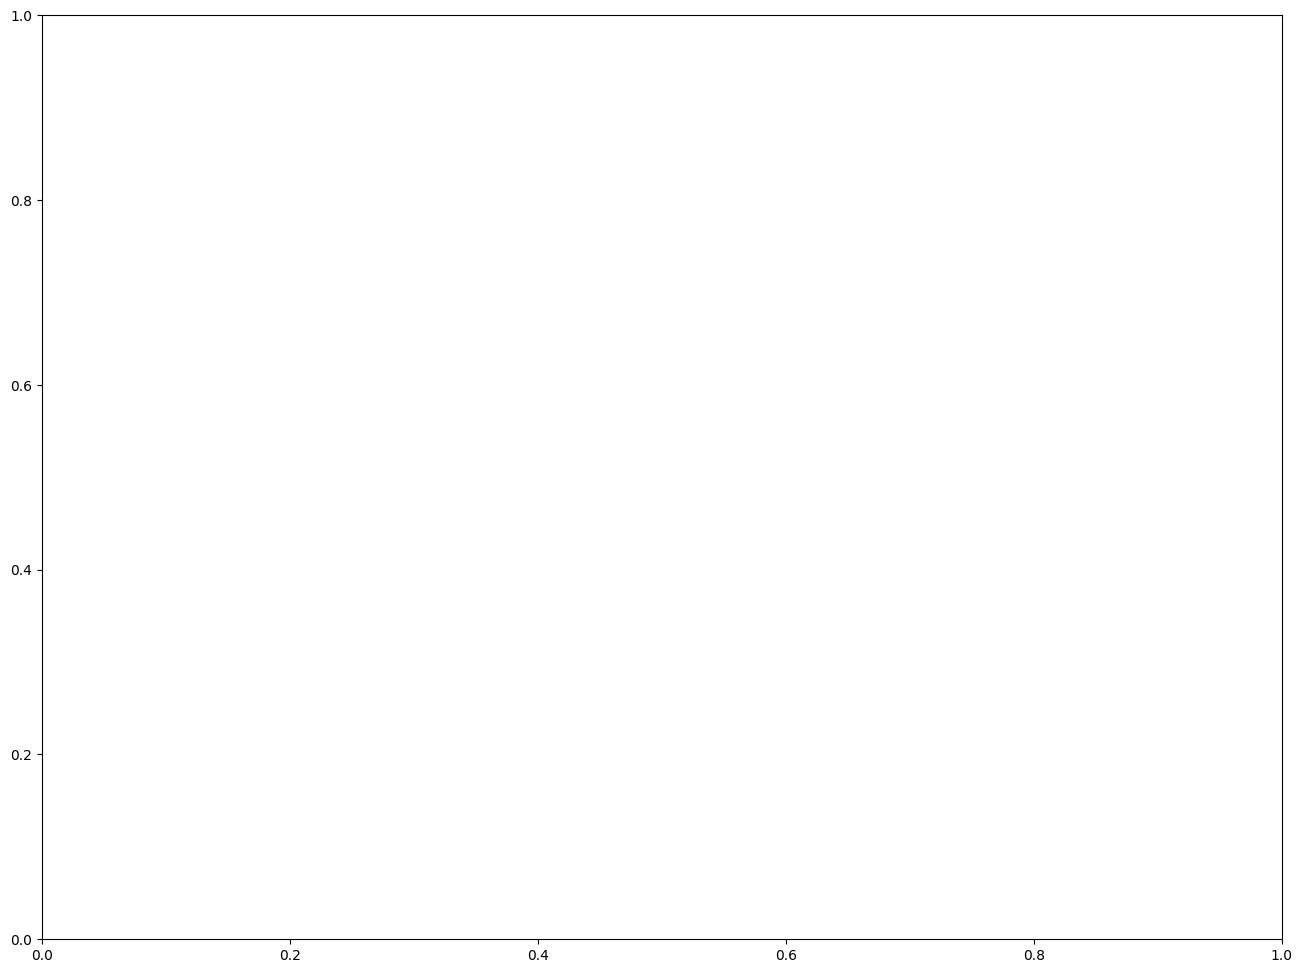

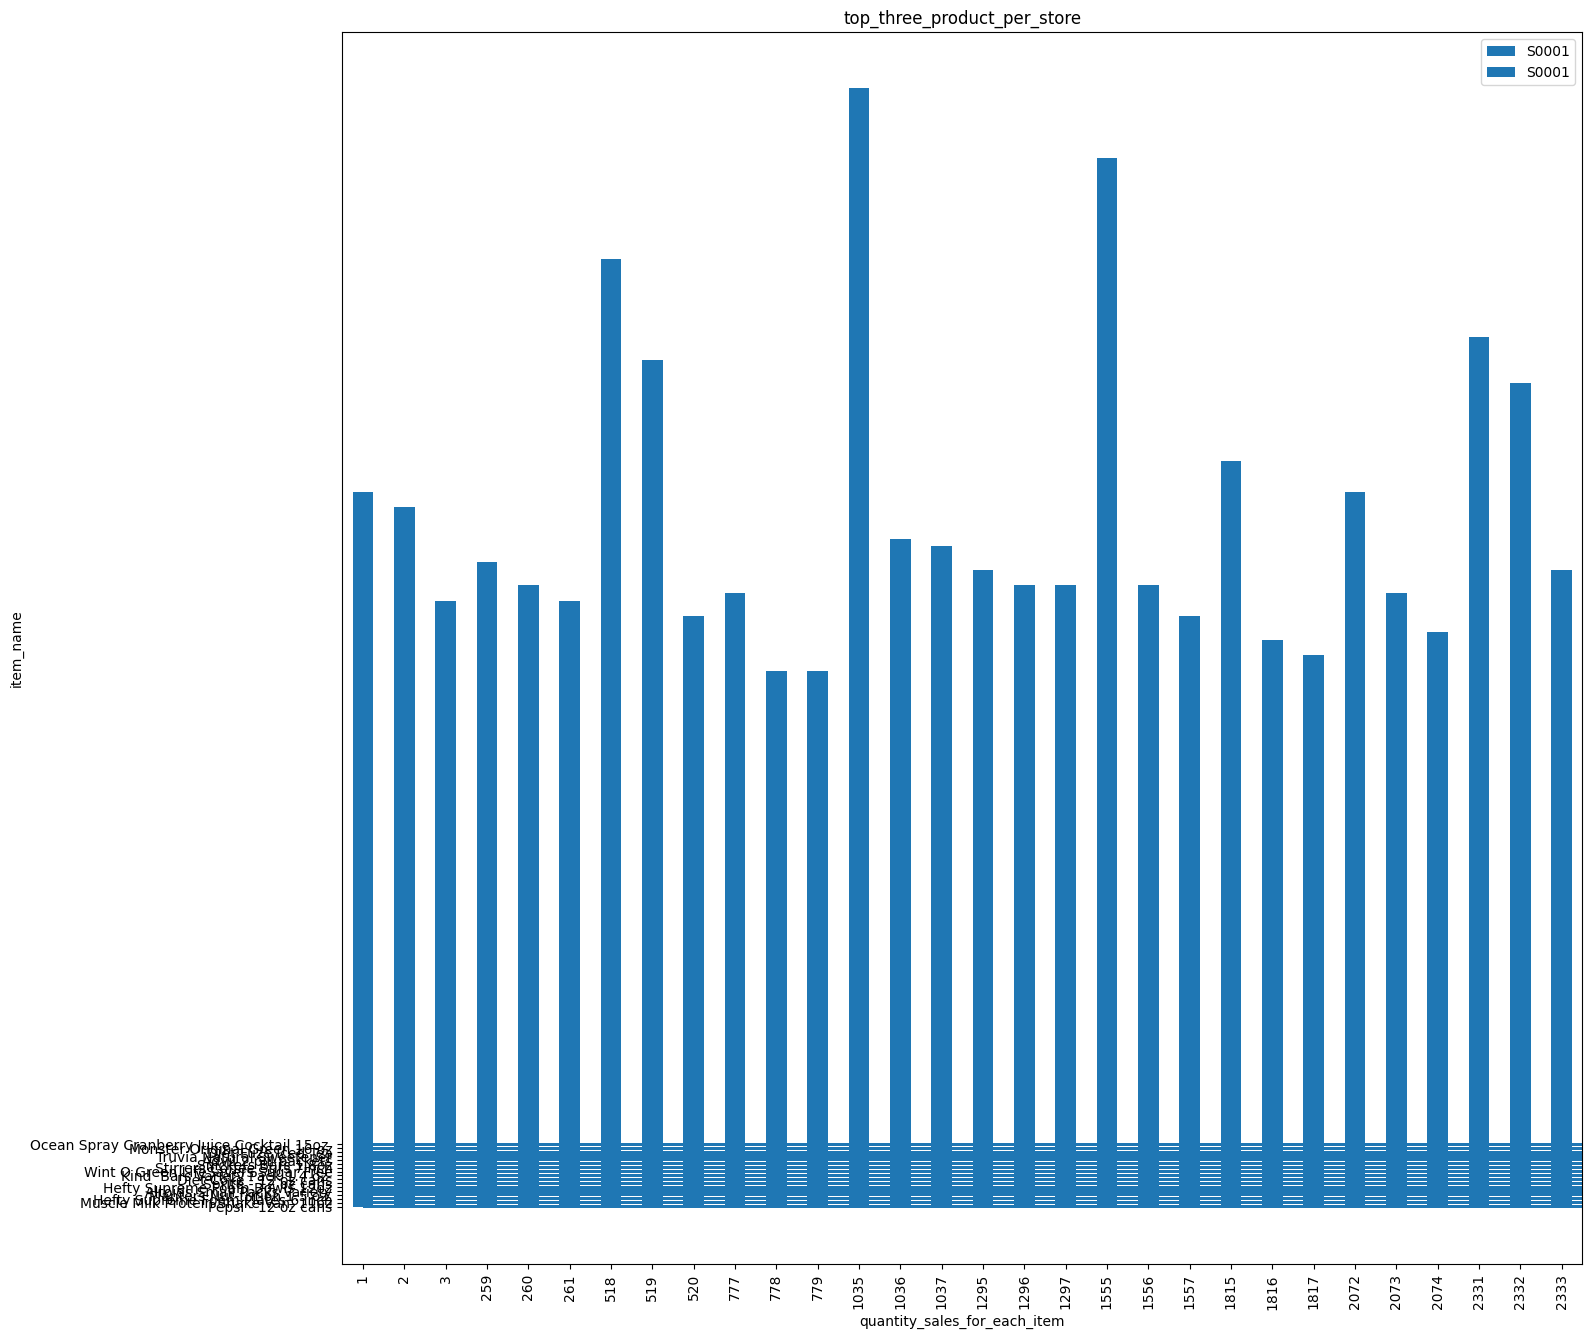

In [70]:
#Figure Size
fig, ax = plt.subplots(figsize =(16, 12))
figsize=(15,10)
plt.figure(figsize=(16,16))
ax = top3.head(30)['quantity'].plot.bar(stacked=True)
#Horizontal Bar Plot
ax.barh(top3.head(30)['item'], top3.head(30)['quantity'])
 
ax.set_ylabel('item_name')
ax.set_xlabel('quantity_sales_for_each_item')
ax.set_title('top_three_product_per_store')
ax.legend(top3.head(30)['store_id'])

plt.show()

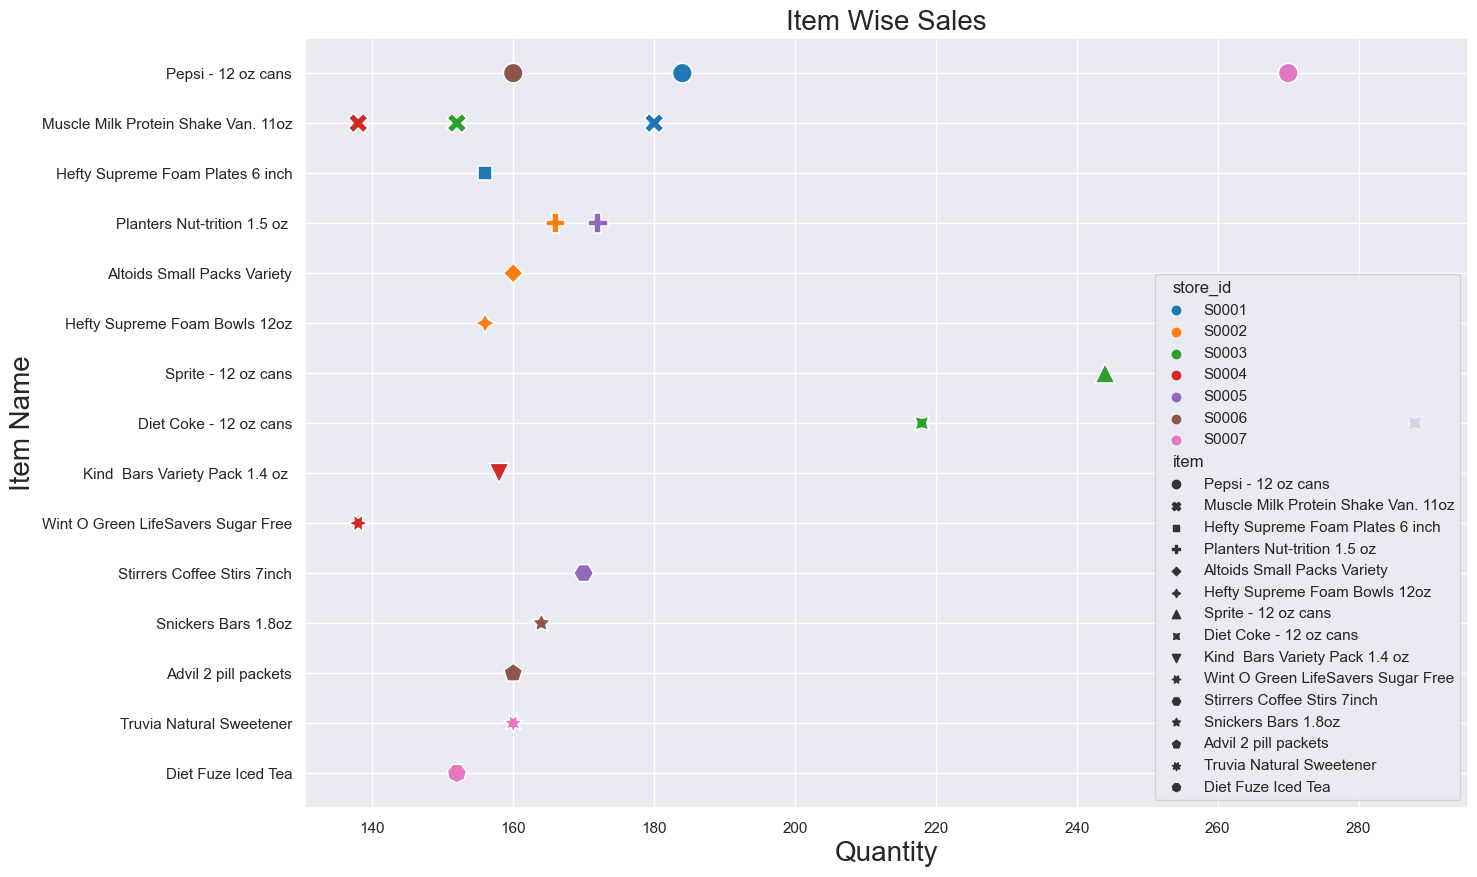

In [211]:
top_=top3[0:21]
plt.figure(figsize = (15, 10))
#plt.title('Year Wise Sales')
plt.title('Item Wise Sales',fontsize=20)
plt.ylabel('Item Name',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
sns.scatterplot(data=top_, x="quantity", y="item", hue="store_id",palette='tab10',s=200,style="item")
sns.set(font_scale = 1)

<AxesSubplot:title={'center':'Store Wise Top 3 items Sales'}, xlabel='store_id', ylabel='quantity'>

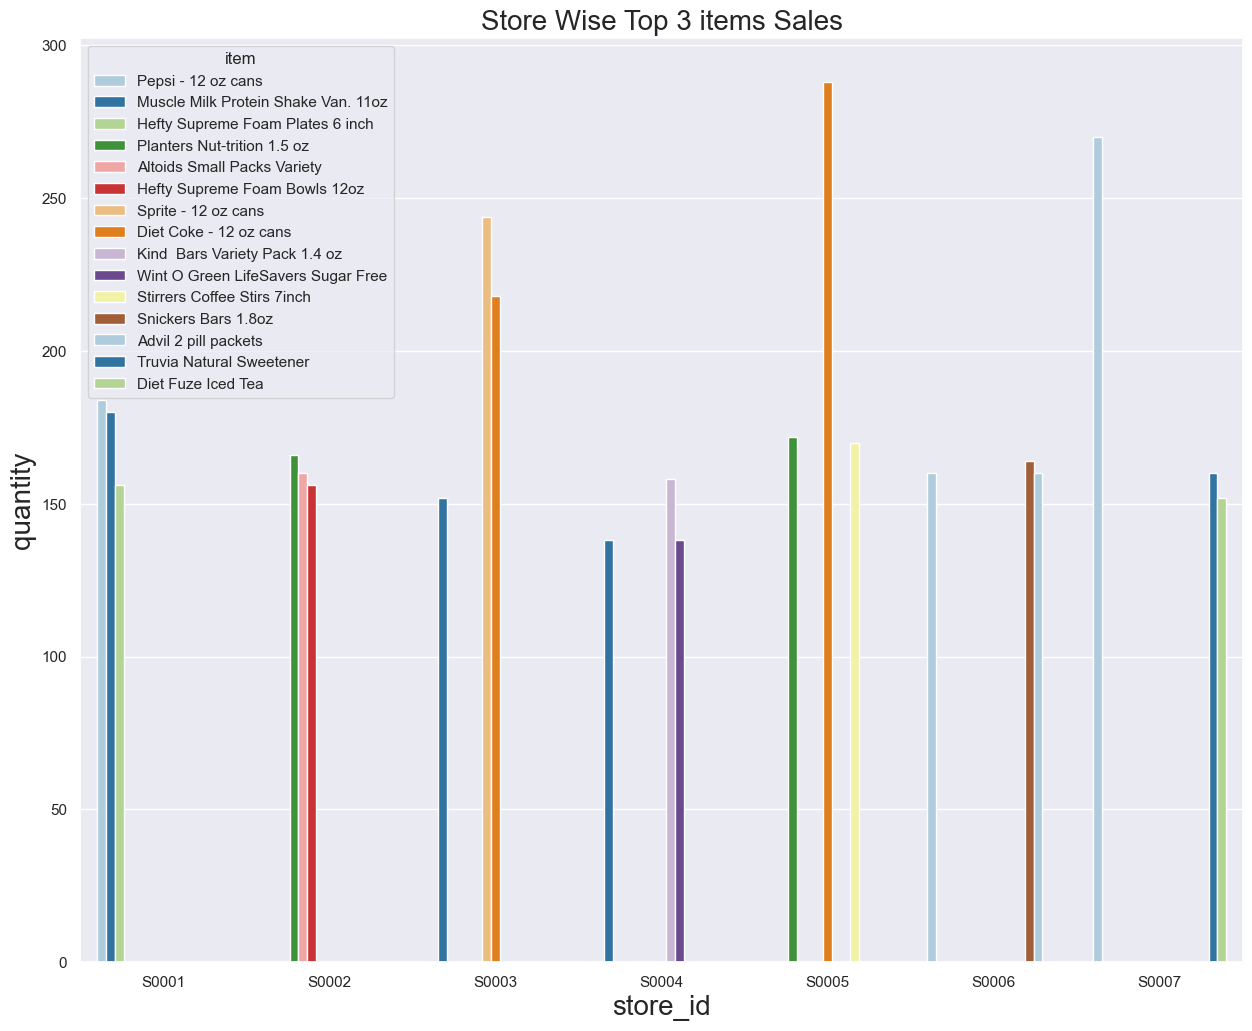

In [212]:
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
#sns.set_theme()
sns.set(font_scale = 3)
sns.set_context("notebook")
plt.title('Store Wise Top 3 items Sales',fontsize=20)
plt.xlabel('Store_id',fontsize=20)
plt.ylabel('Quantity',fontsize=20)

#sns.set_style("darkgrid")
#sns.axes_style("white")
sns.barplot(x=top_['store_id'],y=top_['quantity'],hue=top_['item'],ax=ax,palette='Paired')

Q7: What products have been sold through card since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [213]:
x=input('Enter number of days: ')

Enter number of days: 300


In [214]:
con = PostgresConnection().getConnection()
cur = con.cursor()
s1='''SELECT i.item_name,tim.date,tt.trans_type 
                    FROM ecomdb_star_schema.fact_table ft 
                    JOIN ecomdb_star_schema.item_dim i ON i.item_key=ft.item_key 
                    JOIN ecomdb_star_schema.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN ecomdb_star_schema.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.date>(CURRENT_DATE::date - '
                    '''
s2=str(x)+" days'::interval) AND tt.trans_type='card'"

select_stmt_card = s1+s2
cur.execute(select_stmt_card)
records_card = cur.fetchall()
card = pd.DataFrame(list(records_card), columns=['item_name','date', 'trans_type'])
card

successfully connected to database


,item_name,date,trans_type
0,A&W Root Beer Diet - 12 oz cans,2021-11-01,card
1,A&W Root Beer Diet - 12 oz cans,2021-11-01,card
2,A&W Root Beer Diet - 12 oz cans,2021-12-01,card
3,A&W Root Beer Diet - 12 oz cans,2021-12-01,card
4,A&W Root Beer Diet - 12 oz cans,2021-11-01,card
...,...,...,...
1005,Tylenol Extra Strength 2 pill packets,2021-11-01,card
1006,Tylenol Extra Strength 2 pill packets,2021-11-01,card
1007,Tylenol Extra Strength 2 pill packets,2021-11-01,card
1008,Tylenol Extra Strength 2 pill packets,2021-12-01,card


In [215]:
card.dtypes

item_name     object
date          object
trans_type    object
dtype: object

Q7: What products have been sold through mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [47]:
cur = con.cursor()
s1='''SELECT i.item_name,tim.date,tt.trans_type 
                    FROM ecomdb_star_schema.fact_table ft 
                    JOIN ecomdb_star_schema.item_dim i ON i.item_key=ft.item_key 
                    JOIN ecomdb_star_schema.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN ecomdb_star_schema.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.date>(CURRENT_DATE::date - '
                    '''
s2=str(x)+" days'::interval) AND tt.trans_type='mobile' "

select_stmt_mob = s1+s2
cur.execute(select_stmt_mob)
records_mob = cur.fetchall()
mob = pd.DataFrame(list(records_mob), columns=['item_name','date', 'trans_type'])
mob

,item_name,date,trans_type
0,Cherry Coke 12oz,2021-11-01,mobile
1,Cherry Coke 12oz,2021-11-01,mobile
2,Cherry Coke Zero 12 pack,2021-12-01,mobile
3,Cherry Coke Zero 12 pack,2021-12-01,mobile
4,Coke Classic 12 oz cans,2021-12-01,mobile
...,...,...,...
101,Kleenex Tissue Square Boxes 75/box,2021-11-01,mobile
102,Kleenex Tissue Square Boxes 75/box,2021-12-01,mobile
103,Kleenex Tissue Square Boxes 75/box,2021-12-01,mobile
104,Tylenol Extra Strength 2 pill packets,2021-12-01,mobile


In [48]:
cur = con.cursor()
s1='''SELECT tt.trans_type,COUNT(*)
                    FROM ecomdb_star_schema.fact_table ft 
                    JOIN ecomdb_star_schema.item_dim i ON i.item_key=ft.item_key 
                    JOIN ecomdb_star_schema.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN ecomdb_star_schema.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.date>(CURRENT_DATE::date - '
                    '''
s2=str(x)+" days'::interval) AND (tt.trans_type='card' OR tt.trans_type='mobile') GROUP BY ROLLUP(trans_type) "

select_stmt_mobcard = s1+s2
cur.execute(select_stmt_mobcard)
records_mobcard = cur.fetchall()
mobcard = pd.DataFrame(list(records_mobcard), columns=['trans_type','count'])
mobcard

,trans_type,count
0,None,1116
1,mobile,106
2,card,1010


In [216]:
mobcard.dtypes

trans_type    object
count          int64
dtype: object

<AxesSubplot:ylabel='count'>

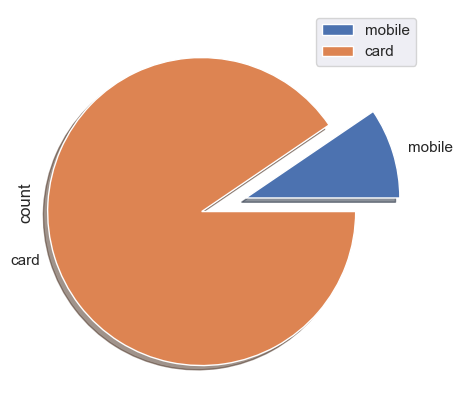

In [217]:
myexplode = [0.1, 0.2]
mobcard = mobcard.set_index(['trans_type'])
l=mobcard[1:3]
l.plot.pie(y='count',figsize=(5,5),shadow='True',explode=myexplode)

Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [49]:
cur = con.cursor()
s_quarter = "SELECT i.item_name, tim.quarter, SUM(ft.total_price) "\
"FROM ecomdb_star_schema.fact_table ft "\
"JOIN ecomdb_star_schema.item_dim i on i.item_key=ft.item_key "\
"JOIN ecomdb_star_schema.time_dim tim on tim.time_key = ft.time_key "\
"GROUP BY CUBE(i.item_name, tim.quarter) "\
"ORDER BY i.item_name, sum(ft.total_price)"
cur.execute(s_quarter)
sq = cur.fetchall()
quarter_info = pd.DataFrame(list(sq), columns=['item', 'quarter', 'sales'])
quarter_info = quarter_info.dropna()
#quarter_info = quarter_info.groupby('quarter').head(10)
quarter_info

,item,quarter,sales
0,100% Juice Box Variety 6.75 oz,Q1,170940.0
1,100% Juice Box Variety 6.75 oz,Q4,174180.0
2,100% Juice Box Variety 6.75 oz,Q2,176280.0
3,100% Juice Box Variety 6.75 oz,Q3,181350.0
5,A&W Root Beer - 12 oz cans,Q2,131905.0
...,...,...,...
1288,Yoplait Original Yogurt Variety Pack,Q3,138264.0
1290,Zoo Animal Cookies/Crackers,Q1,152936.0
1291,Zoo Animal Cookies/Crackers,Q2,154224.0
1292,Zoo Animal Cookies/Crackers,Q4,154560.0


In [50]:
quarter_info2=quarter_info = quarter_info.groupby('item').head(1)
quarter_info

,item,quarter,sales
0,100% Juice Box Variety 6.75 oz,Q1,170940.0
5,A&W Root Beer - 12 oz cans,Q2,131905.0
10,A&W Root Beer Diet - 12 oz cans,Q4,75451.50
15,Advil 2 pill packets,Q1,152684.0
20,All Purpose Cleaner 409 Spray,Q1,191700.0
...,...,...,...
1270,Welch's 100% Juice Variety10 oz,Q2,186796.0
1275,Wint O Green LifeSavers Sugar Free,Q1,170336.0
1280,Wonderful Pistachios (in shell),Q1,245432.0
1285,Yoplait Original Yogurt Variety Pack,Q1,130224.0


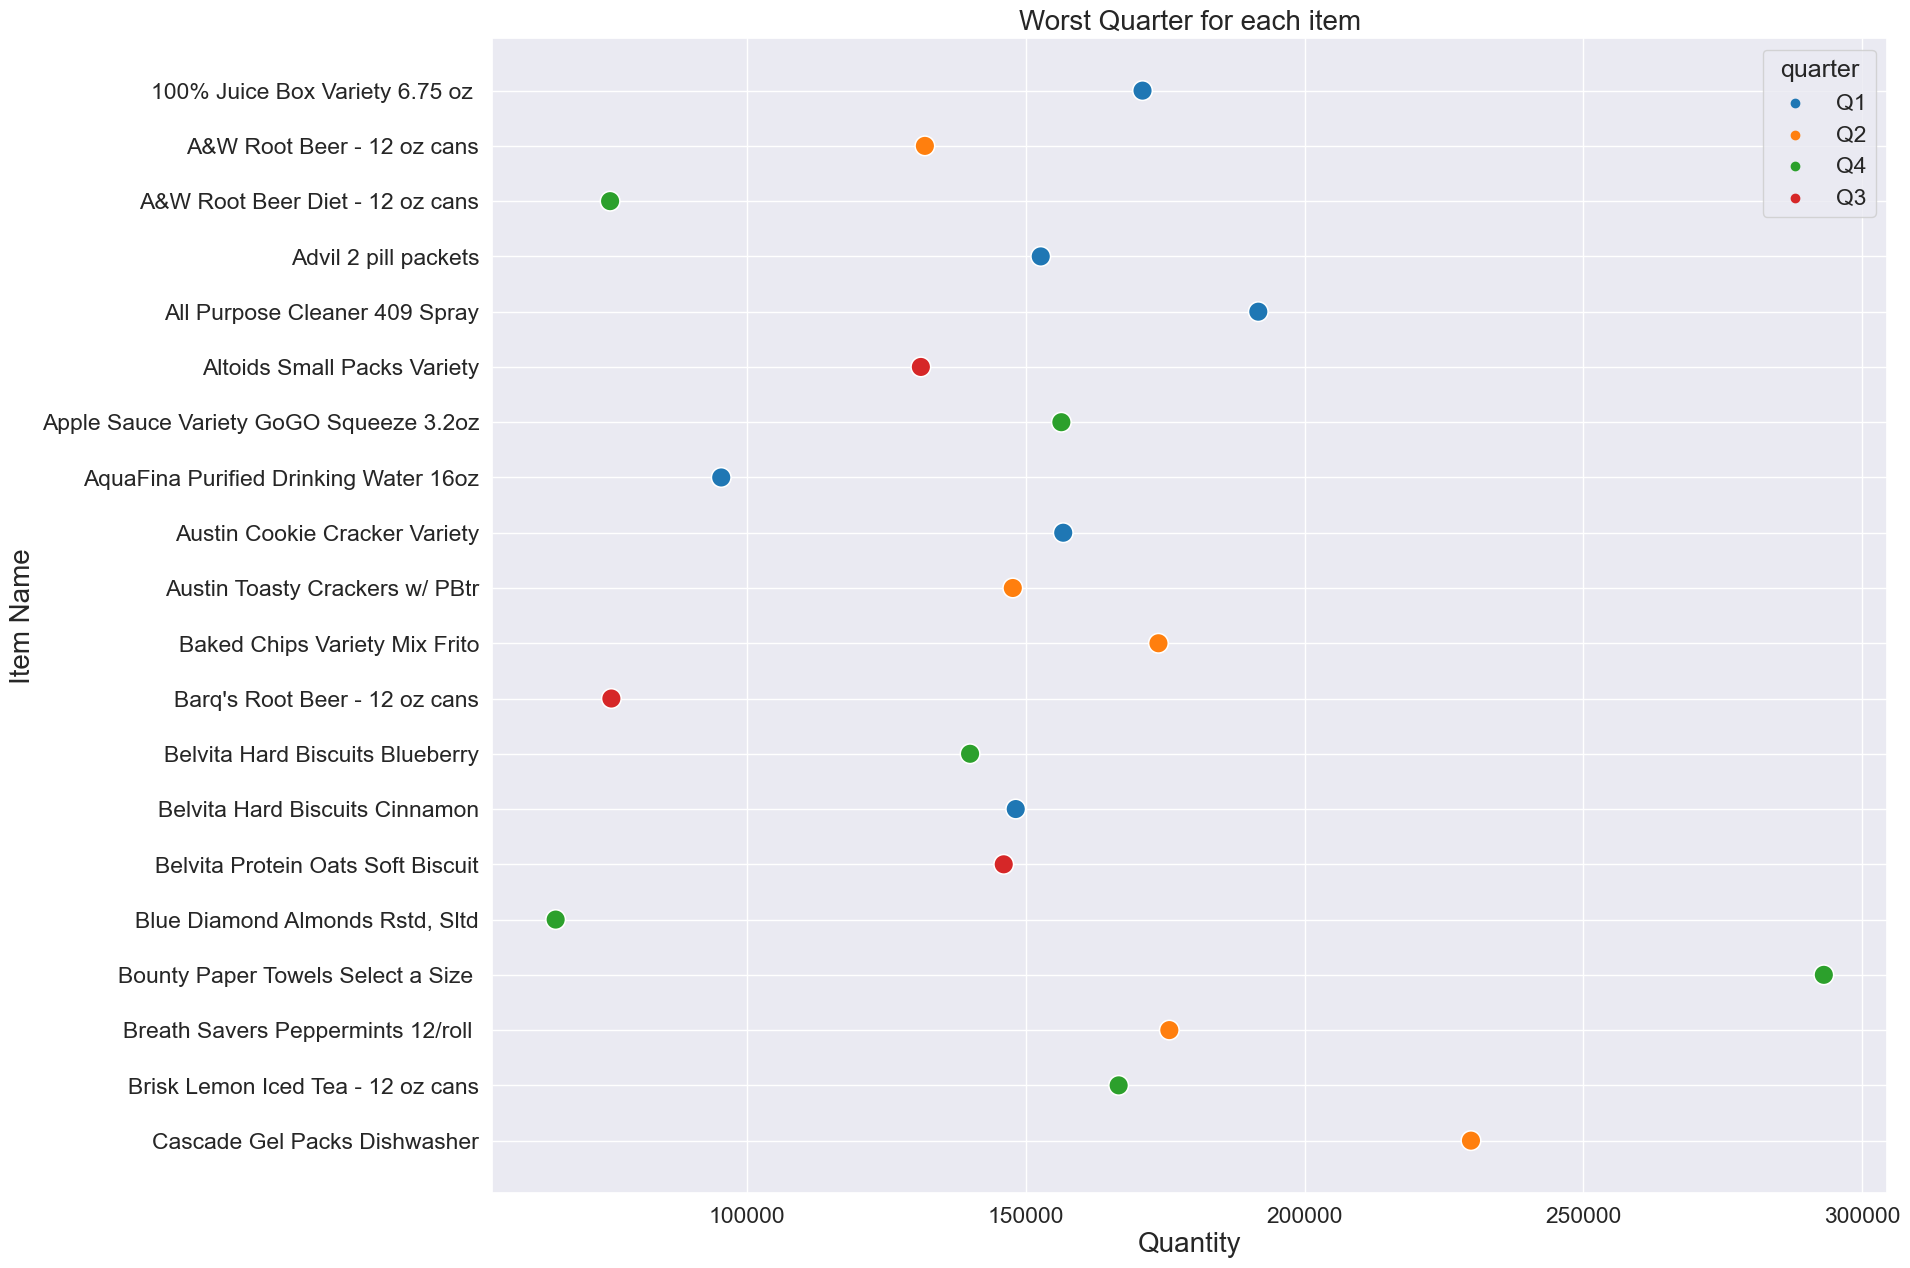

In [220]:
quarter_info=quarter_info[0:20]
plt.figure(figsize = (18, 15))
#plt.title('Year Wise Sales')
sns.set(font_scale = 1.5)
plt.title('Worst Quarter for each item',fontsize=20)
plt.ylabel('Item Name',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
sns.scatterplot(data=quarter_info, x="sales", y="item", hue="quarter",palette='tab10',s=200)
sns.set(font_scale = 1)

In [221]:
quarter_info2

,item,quarter,sales
0,100% Juice Box Variety 6.75 oz,Q1,170940.0
5,A&W Root Beer - 12 oz cans,Q2,131905.0
10,A&W Root Beer Diet - 12 oz cans,Q4,75451.50
15,Advil 2 pill packets,Q1,152684.0
20,All Purpose Cleaner 409 Spray,Q1,191700.0
...,...,...,...
1270,Welch's 100% Juice Variety10 oz,Q2,186796.0
1275,Wint O Green LifeSavers Sugar Free,Q1,170336.0
1280,Wonderful Pistachios (in shell),Q1,245432.0
1285,Yoplait Original Yogurt Variety Pack,Q1,130224.0


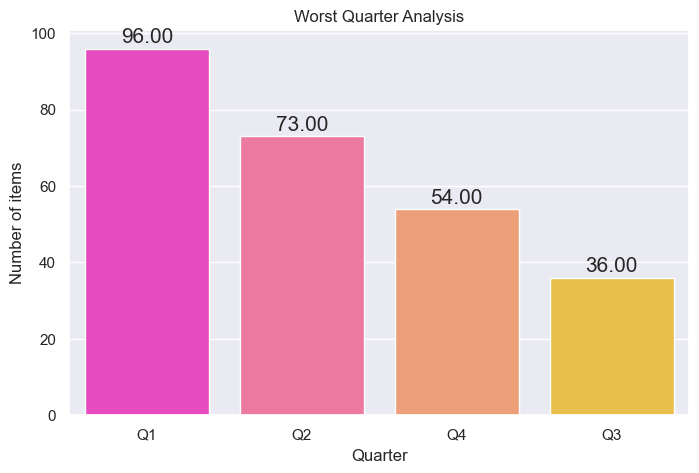

In [222]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plott=sns.countplot(x=quarter_info2['quarter'],palette='spring')
for bar in plott.patches:
    plott.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
#Adding the aesthetics
plt.title('Worst Quarter Analysis')
plt.xlabel('Quarter')
plt.ylabel('Number of items') 

# Show the plot
plt.show()

Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [223]:
select_items = "SELECT i.item_name, s.division, sum(ft.total_price) "\
            "FROM ecomdb_star_schema.fact_table ft "\
            "JOIN ecomdb_star_schema.item_dim i on i.item_key=ft.item_key "\
            "JOIN ecomdb_star_schema.store_dim s on s.store_key = ft.store_key "\
            "GROUP BY CUBE(i.item_name, s.division) "\
            "ORDER BY i.item_name,s.division "
cur.execute(select_items)
itemsdiv = cur.fetchall()
idiv = pd.DataFrame(list(itemsdiv), columns=['Item', 'Division', 'Sales'])
idiv = idiv.dropna()
#pd_data.set_index("Division", inplace = True)
#pd_data['Sales'] = pd_data['Sales'].astype('float64')
idiv.head(30)
#pd_data.plot.pie(y='Sales', figsize=(15,10))

,Item,Division,Sales
0,100% Juice Box Variety 6.75 oz,BARISAL,47580.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,129900.0
2,100% Juice Box Variety 6.75 oz,DHAKA,282390.0
3,100% Juice Box Variety 6.75 oz,KHULNA,75510.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,77460.0
5,100% Juice Box Variety 6.75 oz,RANGPUR,53370.0
6,100% Juice Box Variety 6.75 oz,SYLHET,36540.0
8,A&W Root Beer - 12 oz cans,BARISAL,38203.0
9,A&W Root Beer - 12 oz cans,CHITTAGONG,104121.0
10,A&W Root Beer - 12 oz cans,DHAKA,214958.0


<AxesSubplot:title={'center':'Division wise items Sales'}, xlabel='Sales', ylabel='Item'>

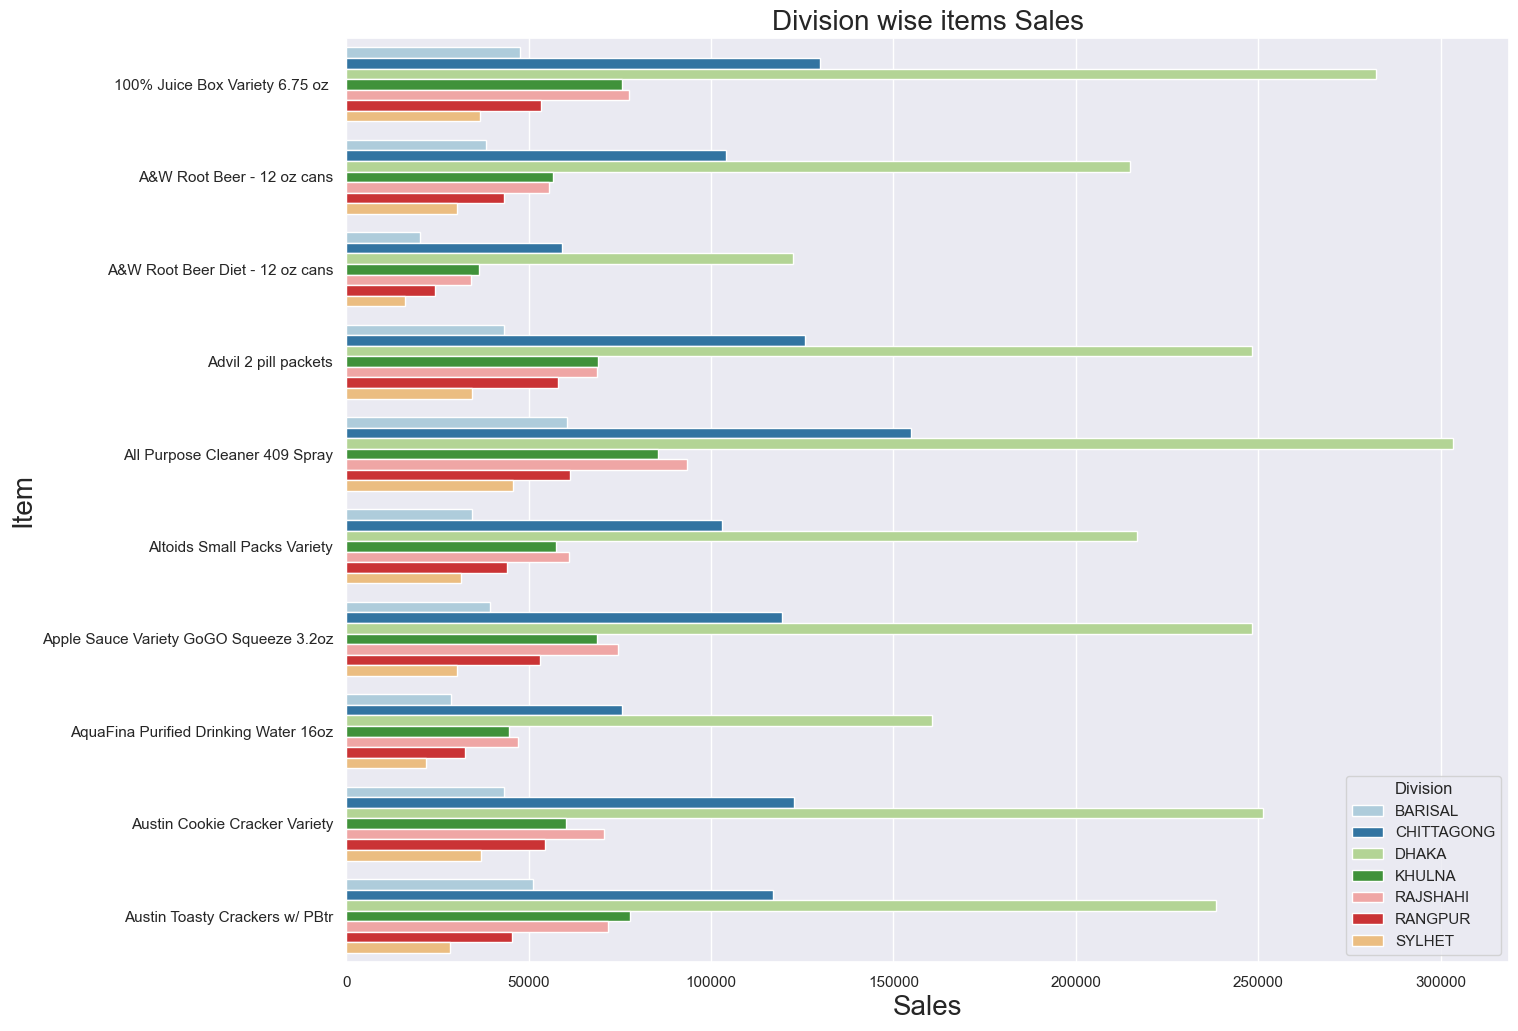

In [224]:
idiv2=idiv[0:70]
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
#sns.set(font_scale = 1)
plt.title('Division wise items Sales',fontsize=20)
plt.xlabel('Item Name',fontsize=20)
plt.ylabel('Sales',fontsize=20)

#sns.set_style("darkgrid")
#sns.axes_style("white")
sns.barplot(data=idiv2,x='Sales',y='Item',hue='Division',ax=ax,palette='Paired')

In [225]:
idi=idiv
idi.sort_values(by=["Sales"],ascending=False,inplace=True)

In [226]:
idi=idi.groupby('Division').head(1)
idi

,Item,Division,Sales
1650,Red Bull 12oz,DHAKA,1021790.0
1649,Red Bull 12oz,CHITTAGONG,493020.0
1652,Red Bull 12oz,RAJSHAHI,297770.0
1651,Red Bull 12oz,KHULNA,279290.0
973,K Cups Daily Chef Columbian Supremo,RANGPUR,203732.0
1648,Red Bull 12oz,BARISAL,190410.0
974,K Cups Daily Chef Columbian Supremo,SYLHET,138330.0


f:\sda lab\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Division wise items Sales'}, xlabel='Item', ylabel='Sales'>

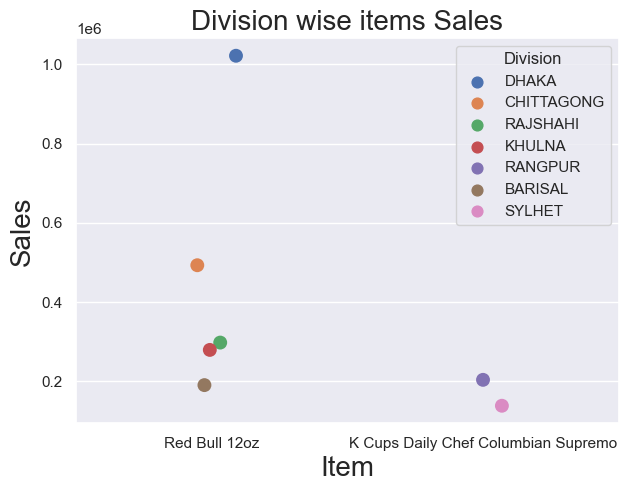

In [227]:
a_dims = (7, 5)
fig, ax = plt.subplots(figsize=a_dims)
#sns.set(font_scale = 1)
plt.title('Division wise items Sales',fontsize=20)
plt.xlabel('Item Name',fontsize=20)
plt.ylabel('Sales',fontsize=20)
sns.stripplot(idi['Item'],idi['Sales'],hue=idi['Division'],s=10)

Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

           s1-> M2 -> avg_sales

In [59]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_avg = "SELECT s.store_key, tim.month, avg(ft.total_price) "\
                "FROM ecomdb_star_schema.fact_table ft "\
                "JOIN ecomdb_star_schema.store_dim s on s.store_key = ft.store_key "\
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key = ft.time_key "\
                "GROUP BY CUBE(s.store_key, tim.month) "\
                "ORDER BY s.store_key, tim.month "
cur.execute(select_avg)
avg = cur.fetchall()
avgmon = pd.DataFrame(list(avg), columns=['store_id', 'month', 'average sales'])
print(avgmon)
#pd_data.plot.bar(x='Month', y='Avg. Sales', rot=0, figsize=(15,10))

successfully connected to database
     store_id  month         average sales
0       S0001    1.0   97.7543103448275862
1       S0001    2.0  100.5776699029126214
2       S0001    3.0  109.4158878504672897
3       S0001    4.0   98.8805309734513274
4       S0001    5.0   99.5245535714285714
...       ...    ...                   ...
9446     None    9.0  105.4656137424143517
9447     None   10.0  105.5257301519569495
9448     None   11.0  105.9146828059985602
9449     None   12.0  105.6896222951285665
9450     None    NaN  105.4014357500000000

[9451 rows x 3 columns]


f:\sda lab\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='average sales'>

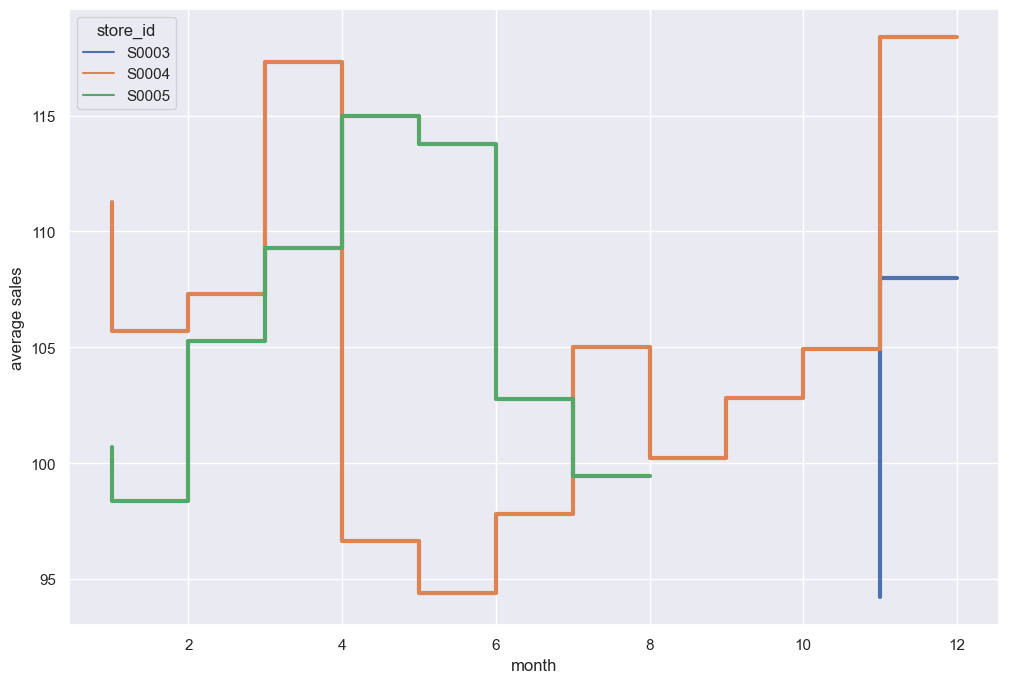

In [228]:
avgmon2=avgmon[36:60]
a_dims = (12, 8)
fig, ax = plt.subplots(figsize=a_dims)
sns.lineplot(avgmon2['month'],avgmon2['average sales'], drawstyle='steps-pre',ax=ax,hue=avgmon2['store_id'],linewidth='3')

<AxesSubplot:xlabel='quantity', ylabel='store_id'>

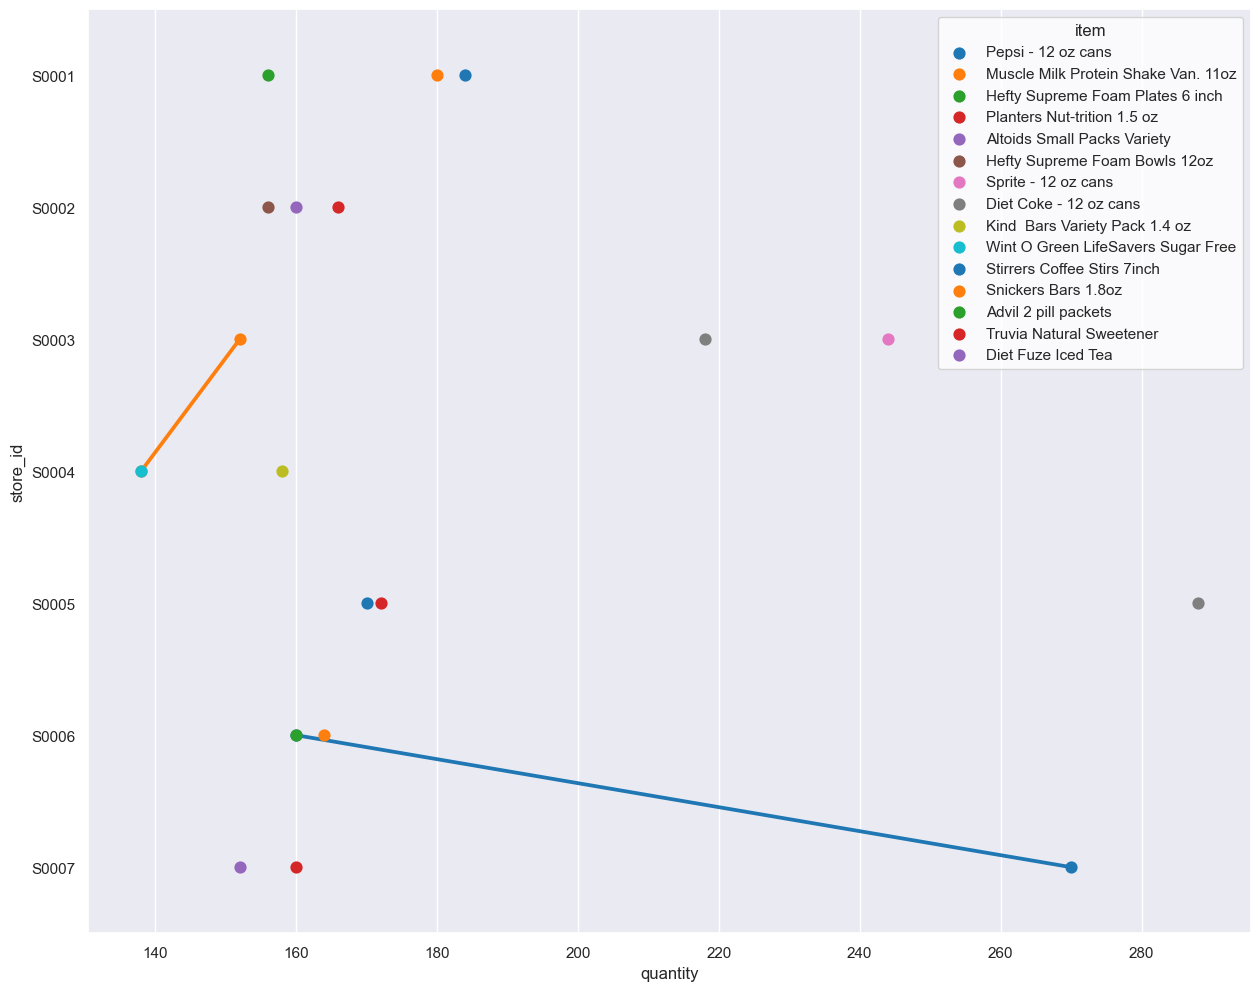

In [229]:
top_=top3[0:21]
a4_dims = (15, 12)
fig, ax = plt.subplots(figsize=a4_dims)
#sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.set(style="whitegrid")
#sns.pointplot(month2['month_name'],month2['sales'],ax=ax,color='r')
sns.pointplot(data=top_,x='quantity',y='store_id',ax=ax,hue='item',palette='tab10')

In [230]:
import seaborn as sns
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="month", y="sales",
             hue="year", 
             data=time)

ValueError: Could not interpret value `month` for parameter `x`